 # Nike Web Scraping: A Developer's Guide using Zyte API

## Introduction
This notebook demonstrates how to use Zyte API to extract data from websites efficiently and reliably. We'll cover different extraction scenarios, focusing on product data from Nike's website.

## Prerequisites

Before we begin, make sure you have:
- A Zyte API account with API key
- Python environment with required libraries (requests)
- Basic understanding of web scraping concepts

In [ ]:
Zyte_Api_Key = "<replace with your API key>"

Zapi_url = "https://api.zyte.com/v1/extract"

## Chapter 1: Extract Product Details with Zyte API

### Understanding the Problem
When working with e-commerce websites, we often need to extract detailed product information. Traditional scraping approaches can be challenging due to complex page structures and anti-scraping measures.

### Setting Up Our First Request
In this example, we'll extract detailed information about a specific Nike shoe product. Zyte API handles JavaScript rendering, CSS processing, and anti-bot measures automatically.

In [ ]:
product_url = (
    "https://www.nike.com/in/t/zoom-fly-6-road-running-shoes-943Pvv/HV4366-072"
)

In [ ]:
from base64 import b64decode

import requests

api_response = requests.post(
    Zapi_url,
    auth=(Zyte_Api_Key, ""),
    json={
        "url": product_url,
        "product" : True
    },
)

product = api_response.json()['product']
print(product)

{'name': 'Nike Zoom Fly 6 Premium', 'price': '16995.0', 'currency': 'INR', 'currencyRaw': '₹', 'availability': 'InStock', 'sku': 'HV4366-072', 'brand': {'name': 'Nike'}, 'mainImage': {'url': 'https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/af1404da-2705-446b-8475-aec30e1745e3/ZOOM+FLY+6+PRM.png'}, 'images': [{'url': 'https://static.nike.com/a/images/t_default/550ac663-a2e2-47b2-aa7f-d60b5f2b0a5b/ZOOM+FLY+6+PRM.png'}, {'url': 'https://static.nike.com/a/images/t_default/3831da2a-f40b-4f54-a38f-6302c5e33d68/ZOOM+FLY+6+PRM.png'}, {'url': 'https://static.nike.com/a/images/t_PDP_1728_v1/f_auto,q_auto:eco/af1404da-2705-446b-8475-aec30e1745e3/ZOOM+FLY+6+PRM.png'}, {'url': 'https://static.nike.com/a/images/t_default/9c9c6ed5-5b39-44eb-b21c-8f154709dc12/ZOOM+FLY+6+PRM.png'}, {'url': 'https://static.nike.com/a/images/t_default/78c89b1e-7aa9-4841-aca3-a62469aabb1f/ZOOM+FLY+6+PRM.png'}, {'url': 'https://static.nike.com/a/images/t_default/a2196bc4-96c5-48d8-9f09-3cda6d41a7cc/ZOOM+FL

## Chapter 2: Extracting Product Lists from Category Pages

### The Challenge of Category Pages
Category pages usually contain multiple products with pagination, lazy loading, and other dynamic features. Zyte API simplifies this with the productList extraction type.

### Basic Category Page Extraction
Let's extract all products from Nike's running shoes category page.

In [ ]:
shoe_Category = "https://www.nike.com/in/w/running-shoes-37v7jzy7ok"

In [ ]:
from base64 import b64decode

import requests

api_response = requests.post(
    Zapi_url,
    auth=(Zyte_Api_Key, ""),
    json={
        "url": shoe_Category,
        "productList" : True,

    },
)

products = api_response.json()['productList']['products']
print(products)
print(len(products))


[{'url': 'https://www.nike.com/in/w/mens-pegasus-running-shoes-37v7jz8nexhznik1zy7ok', 'name': 'Run In Pegasus 41', 'mainImage': {'url': 'https://static.nike.com/a/images/w_1536,c_limit/f32c5373-394a-4202-98a8-b66b0cc416b1/image.jpg'}, 'metadata': {'probability': 0.7345084253833711}}, {'url': 'https://www.nike.com/in/t/alphafly-3-road-racing-shoes-HVSdHc/HQ3501-100', 'name': "Men's Road Racing Shoes", 'price': '23795.0', 'currencyRaw': '₹', 'currency': 'INR', 'mainImage': {'url': 'https://static.nike.com/a/images/c_limit,w_592,f_auto/t_product_v1/b98e67b8-45cf-4bfa-81f8-c1f3ea6461de/AIR+ZOOM+ALPHAFLY+NEXT%25+3+PRM.png'}, 'metadata': {'probability': 0.9377194028702078}}, {'url': 'https://www.nike.com/in/t/alphafly-3-eliud-kipchoge-road-racing-shoes-FSMt5R/HJ7041-300', 'name': "Men's Road Racing Shoes", 'price': '23795.0', 'currencyRaw': '₹', 'currency': 'INR', 'mainImage': {'url': 'https://static.nike.com/a/images/c_limit,w_592,f_auto/t_product_v1/9df887f6-b642-4788-9db0-8502f0be219f/AI

## Chapter 3: Simulating User Actions

### Enhancing Extraction with Interactions
Some websites load content progressively as the user scrolls. Zyte API allows us to simulate these interactions to access more data.

### Scrolling to Load More Products
In this example, we'll simulate scrolling to the bottom of the page to load more products.


### ScrollBottom

In [ ]:
from base64 import b64decode
import requests


api_response = requests.post(
    Zapi_url,
    auth=(Zyte_Api_Key, ""),
    json={
        "url": "https://www.nike.com/in/w/running-37v7j",
        "productList": True,
        "actions": [
             {
                    "action": "waitForTimeout",
                    "timeout": 5,
                    "onError": "return"
                },

            {
                "action": "scrollBottom",

            },
        ],
    },
)

products = api_response.json()['productList']['products']
print(products)
print(len(products))

[{'url': 'https://www.nike.com/in/w/mens-pegasus-running-shoes-37v7jz8nexhznik1zy7ok', 'name': 'Run In Pegasus 41', 'mainImage': {'url': 'https://static.nike.com/a/images/w_1536,c_limit/f32c5373-394a-4202-98a8-b66b0cc416b1/image.jpg'}, 'metadata': {'probability': 0.6325649678201373}}, {'url': 'https://www.nike.com/in/t/alphafly-3-road-racing-shoes-HVSdHc/HQ3501-100', 'name': "Men's Road Racing Shoes", 'price': '23795.0', 'currencyRaw': '₹', 'currency': 'INR', 'mainImage': {'url': 'https://static.nike.com/a/images/c_limit,w_592,f_auto/t_product_v1/b98e67b8-45cf-4bfa-81f8-c1f3ea6461de/AIR+ZOOM+ALPHAFLY+NEXT%25+3+PRM.png'}, 'metadata': {'probability': 0.9514917904304809}}, {'url': 'https://www.nike.com/in/t/alphafly-3-eliud-kipchoge-road-racing-shoes-FSMt5R/HJ7041-300', 'name': "Men's Road Racing Shoes", 'price': '23795.0', 'currencyRaw': '₹', 'currency': 'INR', 'mainImage': {'url': 'https://static.nike.com/a/images/c_limit,w_592,f_auto/t_product_v1/9df887f6-b642-4788-9db0-8502f0be219f/AI

## Chapter 4: Advanced Techniques - Using Zyte API Proxy Mode

### Accessing API Endpoints
Sometimes, direct API access is more efficient than scraping rendered pages. Zyte API Proxy Mode helps us make authenticated API requests while handling proxy management.

### Nike API Integration with Zyte Proxy
In this example, we'll access Nike's internal API to retrieve men's shoes data.



In [ ]:
import requests

# ✅ Replace with your Zyte API Key
ZYTE_API_KEY = "<Enter your API Key>"

# ✅ Nike API URL (for men's shoes as an example)
NIKE_API_URL = "https://api.nike.com/discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/mens-shoes-nik1zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,0f64ecc7-d624-4e91-b171-b83a03dd8550&queryType=PRODUCTS&anchor=0&count=24"

# ✅ Nike API Headers
HEADERS = {
    "nike-api-caller-id": "nike:dotcom:browse:wall.client:2.0",
    "Referer": "https://www.nike.com/",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36",
}

# ✅ Zyte API Proxy Configuration
PROXIES = {scheme: f"http://{ZYTE_API_KEY}:@api.zyte.com:8011" for scheme in ("http", "https")}

# 🔥 Fetch data from Nike API via Zyte Proxy
try:
    print(f"\nFetching data from: {NIKE_API_URL} via Zyte Proxy...")

    response = requests.get(NIKE_API_URL, headers=HEADERS, proxies=PROXIES, timeout=30, verify=False)
    response.raise_for_status()  # Raise error for bad responses

    # ✅ Parse JSON response
    data = response.json()

    # ✅ Extract products
    products = data.get("productGroupings", [])

    if not products:
        print("❌ No products found.")
    else:
        print(f"\n✅ Total Products Found: {data['pages']['totalResources']}\n")

        # ✅ Display extracted products
        for product in products:
            product_info = product.get("products", [])[0]  # Get first product in group
            title = product_info.get("copy", {}).get("title", "N/A")
            subtitle = product_info.get("copy", {}).get("subTitle", "N/A")
            price = product_info.get("prices", {}).get("currentPrice", "N/A")
            currency = product_info.get("prices", {}).get("currency", "")
            image_url = product_info.get("colorwayImages", {}).get("portraitURL", "N/A")
            product_url = product_info.get("pdpUrl", {}).get("url", "N/A")

            print(f"🛒 {title} - {subtitle}")
            print(f"💰 Price: {price} {currency}")
            print(f"🖼 Image: {image_url}")
            print(f"🔗 Product Link: {product_url}")
            print("-" * 60)

except requests.exceptions.RequestException as e:
    print(f"\n❌ Error fetching data: {e}")




Fetching data from: https://api.nike.com/discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/mens-shoes-nik1zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,0f64ecc7-d624-4e91-b171-b83a03dd8550&queryType=PRODUCTS&anchor=0&count=24 via Zyte Proxy...


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.zyte.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



✅ Total Products Found: 633

🛒 Nike Pegasus Premium - Men's Road Running Shoes
💰 Price: 19295.0 INR
🖼 Image: https://static.nike.com/a/images/t_default/80b18cd6-e23b-4d67-a2c3-837e781c1b4f/NIKE+PEGASUS+PREMIUM.png
🔗 Product Link: https://www.nike.com/in/t/pegasus-road-running-shoes-xzQQKz/HQ2592-002
------------------------------------------------------------
🛒 Nike Dunk Low Retro - Men's Shoe
💰 Price: 8295.0 INR
🖼 Image: https://static.nike.com/a/images/t_default/b1bcbca4-e853-4df7-b329-5be3c61ee057/NIKE+DUNK+LOW+RETRO.png
🔗 Product Link: https://www.nike.com/in/t/dunk-low-retro-shoe-66RGqF/DD1391-100
------------------------------------------------------------
🛒 Air Jordan 1 Low - Men's Shoes
💰 Price: 10795.0 INR
🖼 Image: https://static.nike.com/a/images/t_default/u_126ab356-44d8-4a06-89b4-fcdcc8df0245,c_scale,fl_relative,w_1.0,h_1.0,fl_layer_apply/66b1a0a7-2277-4ab5-8f94-03e52d4fcd45/AIR+JORDAN+1+LOW.png
🔗 Product Link: https://www.nike.com/in/t/air-jordan-1-low-shoes-zlGlds/CV3043

### Zyte API Proxy Mode to fetch data from all categories.

### Bulk Data Collection from Multiple Categories
When working with large e-commerce sites, we often need to collect data from multiple categories simultaneously. Using Zyte API Proxy Mode, we can efficiently fetch data from Nike's men's, women's, and kids' categories.

In [ ]:
import requests

# ✅ Replace with your Zyte API Key
ZYTE_API_KEY = "f876ca09bcb8493db6163572c0fbb2bb"

# ✅ Nike API Headers
HEADERS = {
    "nike-api-caller-id": "nike:dotcom:browse:wall.client:2.0",
    "Referer": "https://www.nike.com/",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36",
}

# ✅ Zyte API Proxy Configuration
PROXIES = {scheme: f"http://{ZYTE_API_KEY}:@api.zyte.com:8011" for scheme in ("http", "https")}

# ✅ Nike API URLs (from Scrapy start_urls)
START_URLS = [
    "https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/mens-shoes-nik1zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,0f64ecc7-d624-4e91-b171-b83a03dd8550&queryType=PRODUCTS&anchor=48&count=24",
    "https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/womens-shoes-5e1x6zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,7baf216c-acc6-4452-9e07-39c2ca77ba32&queryType=PRODUCTS&anchor=24&count=24",
    "https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/kids-shoes-v4dhzy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,145ce13c-5740-49bd-b2fd-0f67214765b3&queryType=PRODUCTS&anchor=24&count=24",
]

def fetch_products():
    """
    Fetch products from Nike API using Zyte Proxy Mode.
    """
    for url in START_URLS:
        try:
            print(f"\nFetching data from: {url} via Zyte Proxy...")

            # ✅ Make request via Zyte Proxy
            response = requests.get(url, headers=HEADERS, proxies=PROXIES, timeout=30, verify=False)
            response.raise_for_status()  # Raise error for bad responses

            # ✅ Parse JSON response
            data = response.json()

            # ✅ Extract number of items
            total_items = data.get("pages", {}).get("totalResources", 0)
            print(f"✅ Num of items found: {total_items} items in URL: {url}")

            # ✅ Extract product details
            products = data.get("productGroupings", [])
            for product in products:
                product_info = product.get("products", [])[0]
                title = product_info.get("copy", {}).get("title", "N/A")
                subtitle = product_info.get("copy", {}).get("subTitle", "N/A")
                price = product_info.get("prices", {}).get("currentPrice", "N/A")
                currency = product_info.get("prices", {}).get("currency", "")
                print(f"🛒 {title} - {subtitle} | 💰 {price} {currency}")

        except requests.exceptions.RequestException as e:
            print(f"\n❌ Error fetching data from {url}: {e}")

# 🔥 Start fetching
fetch_products()



Fetching data from: https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/mens-shoes-nik1zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,0f64ecc7-d624-4e91-b171-b83a03dd8550&queryType=PRODUCTS&anchor=48&count=24 via Zyte Proxy...


/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.zyte.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Num of items found: 633 items in URL: https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/mens-shoes-nik1zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,0f64ecc7-d624-4e91-b171-b83a03dd8550&queryType=PRODUCTS&anchor=48&count=24
🛒 Nike Calm - Men's Flip-Flops | 💰 3895.0 INR
🛒 Air Jordan 6 Retro 'White/Black' - Men's Shoes | 💰 18395.0 INR
🛒 Nike Invincible 3 - Men's Road Running Shoes | 💰 16995.0 INR
🛒 Nike Phantom Luna 2 Academy - MG High-Top Football Boot | 💰 8995.0 INR
🛒 Nike Precision 7 - Men's Basketball Shoes | 💰 5695.0 INR
🛒 Nike Elevate 3 - Basketball Shoes | 💰 7095.0 INR
🛒 Nike Metcon 9 AMP - Men's Workout Shoes | 💰 12795.0 INR
🛒 Nike Downshifter 13 - Men's Road Running Shoes | 💰 4295.0 INR
🛒 Nike Cortez Leather - Men's Shoes | 💰 9695.0 INR
🛒 Nike Free Metcon 6 - Men's Workout Shoes | 💰 10795.0 INR
🛒 Nike Zoom Vomero 5 - Men's Shoes | 💰 14995.0 INR
🛒 Nike Killshot 2 Leather - Men

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.zyte.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Num of items found: 600 items in URL: https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/womens-shoes-5e1x6zy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,7baf216c-acc6-4452-9e07-39c2ca77ba32&queryType=PRODUCTS&anchor=24&count=24
🛒 Nike Vaporfly 3 Electric - Women's Road Racing Shoes | 💰 21395.0 INR
🛒 Nike Dunk Low Premium - Women's Shoes | 💰 11895.0 INR
🛒 Nike Go FlyEase - Women's Easy On/Off Shoes | 💰 11895.0 INR
🛒 Air Jordan 1 Low Method of Make - Women's Shoes | 💰 12295.0 INR
🛒 Nike Ultrafly - Men's Trail-Racing Shoes | 💰 21695.0 INR
🛒 Nike Air More Uptempo - Men's Slides | 💰 8495.0 INR
🛒 Nike Metcon 9 - Men's Workout Shoes | 💰 12795.0 INR
🛒 Nike Air Force 1 '07 Essential - Women's Shoes | 💰 9695.0 INR
🛒 Nike Calm - Men's Flip-Flops | 💰 3895.0 INR
🛒 Nike Pegasus Plus - Women's Road Running Shoes | 💰 16995.0 INR
🛒 Nike Precision 7 - Men's Basketball Shoes | 💰 5695.0 INR
🛒 Nike Eleva

/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.zyte.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


✅ Num of items found: 610 items in URL: https://api.nike.com//discover/product_wall/v1/marketplace/IN/language/en-GB/consumerChannelId/d9a5bc42-4b9c-4976-858a-f159cf99c647?path=/in/w/kids-shoes-v4dhzy7ok&attributeIds=16633190-45e5-4830-a068-232ac7aea82c,145ce13c-5740-49bd-b2fd-0f67214765b3&queryType=PRODUCTS&anchor=24&count=24
🛒 Nike Air Force 1 LV8 - Older Kids' Shoes | 💰 7995.0 INR
🛒 Nike Jr. Mercurial Superfly 9 Club - Younger/Older Kids' TF High-Top Football Shoes | 💰 4495.0 INR
🛒 Air Jordan 1 Mid - Older Kids' Shoes | 💰 7995.0 INR
🛒 Jordan Spizike Low - Older Kids' Shoes | 💰 9295.0 INR
🛒 Jordan 3 Retro - Younger Kids' Shoes | 💰 6495.0 INR
🛒 Nike Sunray Protect 2 - Baby/Toddler Sandals | 💰 2495.0 INR
🛒 Nike Dunk Low SE - Older Kids' Shoes | 💰 7995.0 INR
🛒 Nike Aqua Swoosh - Younger Kids' Sandals | 💰 3595.0 INR
🛒 Nike Kawa - Baby & Toddler Slides | 💰 1395.0 INR
🛒 Nike Kawa - Baby & Toddler Slides | 💰 1395.0 INR
🛒 Nike Pegasus 41 - Older Kids' Road Running Shoes | 💰 7695.0 INR
🛒 Jord

## Chapter 5: Advanced User Behavior Simulation

### Extracting Navigation Elements
Sometimes we need to extract links from a website's navigation menu before crawling those links. This requires waiting for elements to load and then extracting their attributes.

### Dynamic Navigation and Multi-Level Scraping
In this example, we'll first extract navigation labels from Nike's homepage, then visit each category to collect product information.


In [ ]:
import requests
from scrapy.http import HtmlResponse


labels_response = requests.post(
    Zapi_url,
    auth=(Zyte_Api_Key, ""),
    json={
        "url": "https://www.nike.com/in/",
        "browserHtml": True,
        "actions": [
            {
                "action": "waitForSelector",
                "selector": {"type": "css", "value": 'h2.nds-text'},
                "timeout": 15,
                "onError": "return",
            },
        ],
    },
)

if labels_response.status_code == 200:
    html_string = labels_response.json()["browserHtml"]
    response = HtmlResponse(url="https://www.nike.com/in", body=html_string, encoding='utf-8')
    label_links = response.css("a[data-qa='card-link'][aria-label=' ']::attr(href)").extract()
    print(f"Extracted labels: {label_links}")
else:
    print(f"Failed to extract labels. Status code: {labels_response.status_code}")
    print(labels_response.text)
    exit()

results = []
# label_links = ["https://www.nike.com/in/w/running-37v7j"]

for label_link in label_links:
    print(f"Processing label: {label_link}")

    actions = [
        {
            "action": "waitForSelector",
            "selector": {"type": "css", "value": ".product-card"},
            "timeout": 10,
            "onError": "continue",
        },
        {
            "action": "scrollBottom",
            "timeout": 5,
            "maxScrollDelay": 2,
            "onError": "continue",
            "maxScrollCount": 1000,
        },
    ]

    label_response = requests.post(
        Zapi_url,
        auth=(Zyte_Api_Key, ""),
        json={
            "url": label_link,
            "actions": actions,
            "productList": True,
        },
    )

    if label_response.status_code == 200:
        data = label_response.json().get("productList", [])["products"]
        print(f"Fetched {len(data)} items for label '{label_link}'.")
        results.extend(data)
    else:
        print(f"Failed to scrape label '{label_link}'. Status code: {label_response.status_code}")

print("results:", results)

Extracted labels: ['https://www.nike.com/in/w/running-37v7j', 'https://www.nike.com/in/w/football-1gdj0', 'https://www.nike.com/in/w/basketball-3glsm', 'https://www.nike.com/in/w/training-gym-58jto', 'https://www.nike.com/in/w/tennis-ed1q', 'https://www.nike.com/in/w/yoga-anrlj', 'https://www.nike.com/in/w/skateboarding-8mfrf', 'https://www.nike.com/in/w/dance-3cii8']
Processing label: https://www.nike.com/in/w/running-37v7j
Fetched 180 items for label 'https://www.nike.com/in/w/football-1gdj0'.
Processing label: https://www.nike.com/in/w/basketball-3glsm
Fetched 174 items for label 'https://www.nike.com/in/w/basketball-3glsm'.
Processing label: https://www.nike.com/in/w/training-gym-58jto
Fetched 153 items for label 'https://www.nike.com/in/w/training-gym-58jto'.
Processing label: https://www.nike.com/in/w/tennis-ed1q
Fetched 60 items for label 'https://www.nike.com/in/w/tennis-ed1q'.
Processing label: https://www.nike.com/in/w/yoga-anrlj
Fetched 14 items for label 'https://www.nike.c

## Chapter 6: Handling Geolocation-Specific Content

### Location-Based Scraping Challenges
Many websites show different content based on the user's location. Zyte API allows us to simulate specific locations to access geographically restricted content.

### Setting Location for Amazon Scraping
In this example, we'll set a specific postal code to view location-specific products on Amazon.

In [ ]:
from base64 import b64decode

import requests

api_response = requests.post(
    "https://api.zyte.com/v1/extract",
    auth=(Zyte_Api_Key, ""),
    json={
  "url": "https://www.amazon.com/b/?ie=UTF8&node=11058691",
  "actions": [
    {
      "action": "setLocation",
      "onError": "return",
      "address": {
        "postalCode": "11001"
      }
    }
  ],
  "browserHtml": True
},
)

product = api_response.json()
print(product)

{'url': 'https://www.amazon.com/b/?ie=UTF8&node=11058691', 'statusCode': 200, 'browserHtml': '<!DOCTYPE html><html lang="en-us" class="a-ws a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-transform3d a-touch-scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition a-ember" data-19ax5a9jf="dingo" data-aui-build-date="3.24.11-2025-01-29"><!-- sp:feature:head-start --><head><script async="" src="https://c.amazon-adsystem.com/bao-csm/forensics/a9-tq-forensics-incremental.min.js" crossorigin="anonymous"></script><script async="" src="https://images-na.ssl-images-amazon.com/images/I/31z1iMpva1L.js" crossorigin="anonymous"></script><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8">\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type="text/javascr

## Conclusion

In this notebook, we've explored various ways to extract data using Zyte API:
1. Single product extraction
2. Product list extraction from category pages
3. Enhancing extraction with user interactions
4. Using Zyte API Proxy Mode for direct API access
5. Simulating user behavior with complex action sequences
6. Handling geolocation-specific content

These techniques provide powerful and reliable methods for extracting structured data from e-commerce websites, handling common challenges like JavaScript rendering, anti-bot measures, dynamic content loading, and location-based restrictions.

For more information and advanced usage, refer to the [Zyte API documentation](https://docs.zyte.com/zyte-api/).


#What is Zyte API - AI Scraping?

In Zyte API - AI Scraping we have pre-built Scrapy spider templates as part of an open-source library [zyte-spider-templates](https://github.com/zytedata/zyte-spider-templates-project). These templates are designed to simplify and automate web scraping by leveraging the combined power of **Zyte's AI Tech Stack-[Scrapy](https://scrapy.org/), [Zyte API](https://www.zyte.com/zyte-api/), and [Scrapy Cloud](https://www.zyte.com/scrapy-cloud/).**

With these templates, you can extract structured data without writing or maintaining complex scraping logic. They handle tasks like navigating dynamic websites, automatic bans management, rotating proxies, and adapting to  changes in website layouts automatically.

At the core of their AI capabilities is the [Zyte API](https://www.zyte.com/zyte-api/), powered by Automatic Extraction. It eliminates the need to write or maintain CSS selectors and parsing logic, as its AI dynamically adapts to changes in website layouts automatically.

Currently, the templates are optimized for e-commerce websites, making them ideal for extracting product data at scale, with plans to expand support to articles and job postings.

Fully customizable, the templates allow you to tailor crawling logic, data processing, and output schemas to suit specific project needs.


This notebook uses [ecommerce template](https://zyte-spider-templates.readthedocs.io/en/latest/templates/e-commerce.html) to demonstrate a streamlined approach to scalable, high-quality product data extraction.




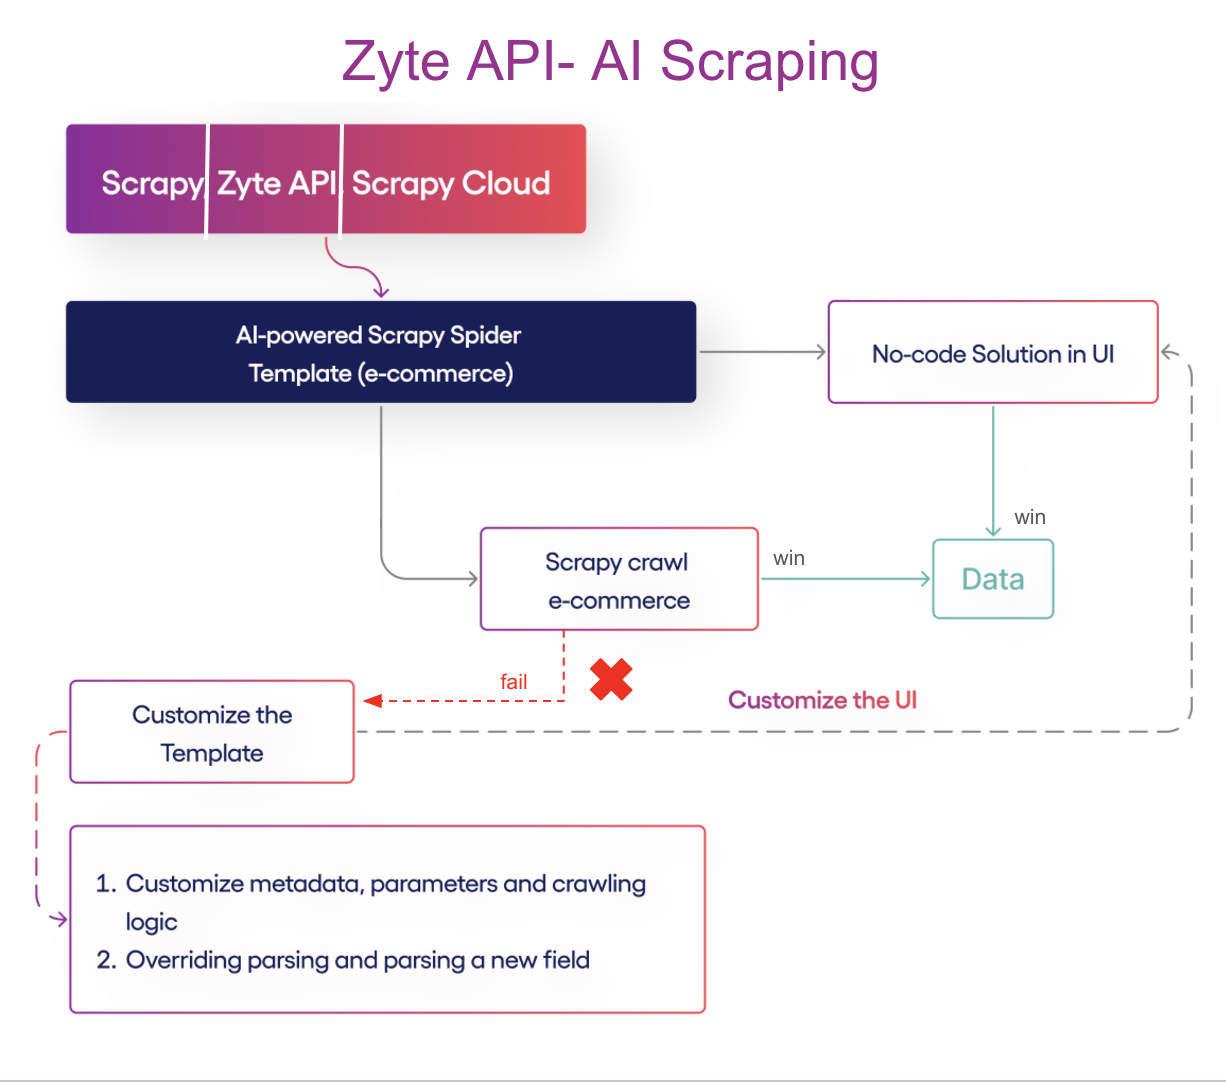


In [ ]:
!git clone https://github.com/zytedata/zyte-spider-templates-project

## Update the files with the new project name

1. Change the name of the directories from `zyte-spider-templates-project` to `Nike_Zyte_Spider_Template`
2. Update the name of the project- `Nike_Zyte_Spider_Template` for the variables- BOT_NAME, SPIDER_MODULE, NEWSPIDER_MODULE, SCRAPY_POET_DISCOVER  in `settings.py`
3. update the name of the project-`Nike_Zyte_Spider_Template` in `scrapy.cfg` file.
4. **Update 'ZYTE_API_KEY' in `settings.py`**

In [ ]:
cd Nike_Zyte_Spider_Template

/content/Nike_Zyte_Spider_Template


In [ ]:
!pip install -r requirements.txt

In [ ]:
!scrapy crawl ecommerce -a url="https://www.nike.com/in/men"

Streaming output truncated to the last 5000 lines.
        "page_type": "product",
        "request_url": "https://www.nike.com/in/t/quest-6-road-running-shoes-26WzN6/FD6033-001",
        "request_priority": 199,
        "request_fingerprint": "ab5d7c1dc2bc4a05863a4f3b2599daf8357d6e83"
      },
      {
        "name": "",
        "probability": 0.9933765530586243,
        "page_type": "product",
        "request_url": "https://www.nike.com/in/t/elevate-3-basketball-shoes-QT43Gj/DD9304-100",
        "request_priority": 199,
        "request_fingerprint": "008bd91561bc12ccee283c9468dd952f93f7856b"
      },
      {
        "name": "",
        "probability": 0.9933096170425415,
        "page_type": "product",
        "request_url": "https://www.nike.com/in/t/calm-mules-KJZKd1/FD5131-001",
        "request_priority": 199,
        "request_fingerprint": "bf678683dc66d2c994c460a8978b54f12cfd142a"
      },
      {
        "name": "",
        "probability": 0.9932587146759033,
        "page_typ

# Know more about Zyte AI Scraping in the following Hands-on Notebook

[Extract product data from multiple e-commerce websites to your notebook with Zyte AI Scraping](https://colab.research.google.com/drive/13WN4Honz-TPYaLAqi-1IXHlcFwSRwOLj?usp=sharing)


